# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Irfan Nur Fahrudin
- **Email:** irfan.nurfahrudin@gmail.com
- **ID Dicoding:** inurart

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap tingkat polusi udara di ketiga lokasi?

- Bagaimana hubungan antara parameter cuaca (kelembaban, suhu, dan kecepatan angin) dengan tingkat polusi udara?


## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
# Mengumpulkan data dari CSV
huairou_df = pd.read_csv("/content/data/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("/content/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
wanliu_df = pd.read_csv("/content/data/PRSA_Data_Wanliu_20130301-20170228.csv")

# Tampilkan beberapa baris awal
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [5]:
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [6]:
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


**Insight:**
- Memastikan file CSV sudah diunggah di /content/data
- Melihat beberapa baris awal pada data

### Assessing Data

In [7]:
# Cek info dataframe
huairou_df.info()
nongzhanguan_df.info()
wanliu_df.info()

# Cek statistik deskriptif
huairou_df.describe()
nongzhanguan_df.describe()
wanliu_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [8]:
# Cek missing value
print(huairou_df.isnull().sum())
print(nongzhanguan_df.isnull().sum())
print(wanliu_df.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


**Insight:**
- info() dan describe() mengidentifikasi tipe data dan persebaran data.

- isnull().sum()  mendeteksi apakah ada kolom missing values.

### Cleaning Data

In [9]:
# Fungsi cleaning data
def clean_air_quality(df):
    # Mengisi nilai numerik yang hilang dengan interpolasi linier
    num_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
    df[num_cols] = df[num_cols].interpolate(method='linear')

    # Mengisi kategori arah angin dengan modus
    df['wd'].fillna(df['wd'].mode()[0], inplace=True)

    # Menghapus baris yang masih memiliki NaN setelah interpolasi (jika ada)
    df.dropna(inplace=True)

    return df


# Membersihkan setiap dataset
huairou_df = clean_air_quality(huairou_df)
nongzhanguan_df = clean_air_quality(nongzhanguan_df)
wanliu_df = clean_air_quality(wanliu_df)

# Cek kembali jumlah missing values
print(huairou_df.isnull().sum())
print(nongzhanguan_df.isnull().sum())
print(wanliu_df.isnull().sum())


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


<ipython-input-9-23ad32d33f6b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(df['wd'].mode()[0], inplace=True)
<ipython-input-9-23ad32d33f6b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

**Insight:**
- Mengisi nilai hilang pada kolom numerik (PM2.5, PM10, SO2, dll.) dengan metode interpolasi linier, yang mempertahankan tren data.
- Kolom wd (arah angin) diisi dengan modus (nilai yang paling sering muncul) untuk menjaga konsistensi data.
- Menghapus baris yang masih memiliki NaN setelah interpolasi, memastikan dataset siap untuk analisis tanpa nilai kosong.

## Exploratory Data Analysis (EDA)

### Explore ...

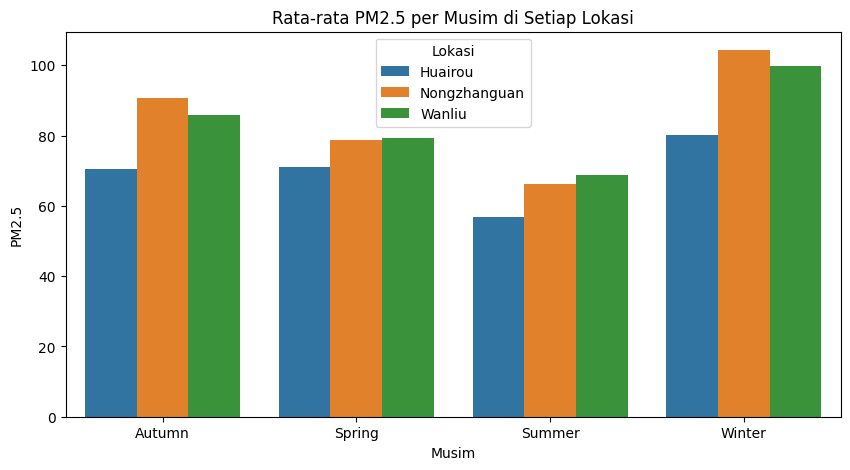

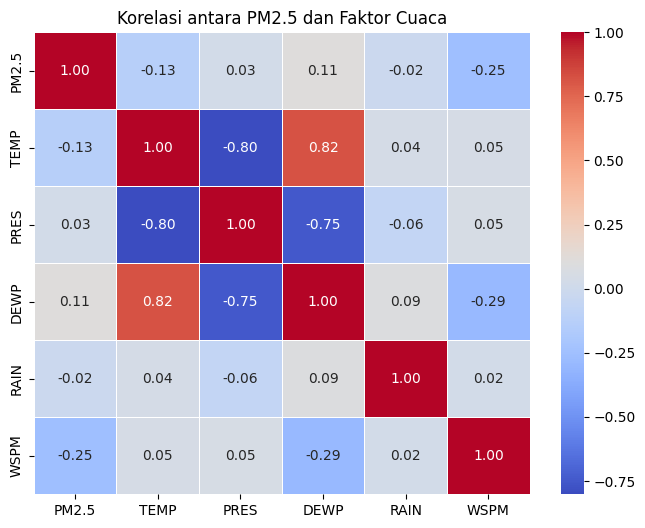

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mengumpulkan data dari CSV
huairou_df = pd.read_csv("/content/data/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("/content/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
wanliu_df = pd.read_csv("/content/data/PRSA_Data_Wanliu_20130301-20170228.csv")

# Tambahkan kolom lokasi
huairou_df["location"] = "Huairou"
nongzhanguan_df["location"] = "Nongzhanguan"
wanliu_df["location"] = "Wanliu"

# Gabungkan dataset
df = pd.concat([huairou_df, nongzhanguan_df, wanliu_df], ignore_index=True)

# Buat kolom datetime
df["date"] = pd.to_datetime(df[["year", "month", "day"]])
df.head()

# Fungsi menentukan musim
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["month"].apply(get_season)

# Rata-rata PM2.5 per musim
seasonal_pm25 = df.groupby(["season", "location"])["PM2.5"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="PM2.5", hue="location", data=seasonal_pm25)
plt.title("Rata-rata PM2.5 per Musim di Setiap Lokasi")
plt.xlabel("Musim")
plt.ylabel("PM2.5")
plt.legend(title="Lokasi")
plt.show()

# Korelasi antara PM2.5 dan faktor cuaca
weather_corr = df[["PM2.5", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara PM2.5 dan Faktor Cuaca")
plt.show()

**Insight:**
- Dari histogram Rata-rata PM2.5 per Musim di Setiap Lokasi kita dapat melihat rata-rata PM2.5 per musim di 3 lokasi yang berbeda. Dengan grafik yang mirip, namun rata-rata kota Huairou memiliki PM2.5 terendah di berbagai musim.

- Dari histogram korelasi, kita dapat melihat berbagai korelasi yang positif maupun negatif. Contohnya Suhu (TEMP) memiliki korelasi negatif ➝ Saat suhu naik, PM2.5 cenderung turun.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

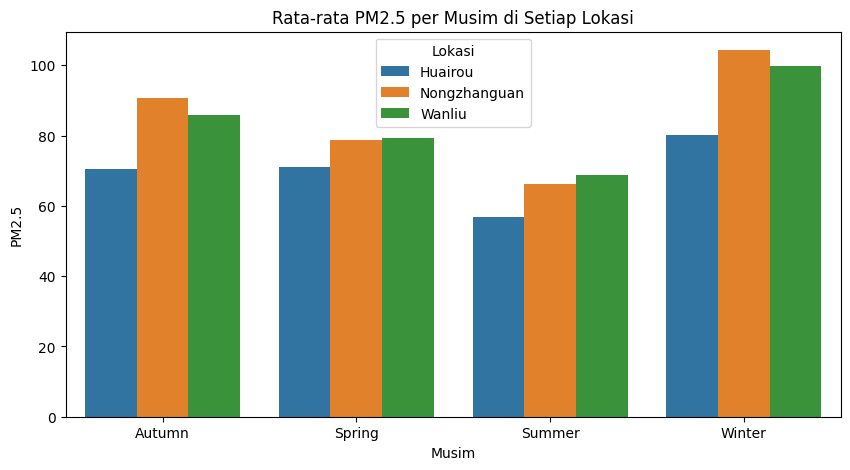

In [12]:
# Rata-rata PM2.5 per musim
seasonal_pm25 = df.groupby(["season", "location"])["PM2.5"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="PM2.5", hue="location", data=seasonal_pm25)
plt.title("Rata-rata PM2.5 per Musim di Setiap Lokasi")
plt.xlabel("Musim")
plt.ylabel("PM2.5")
plt.legend(title="Lokasi")
plt.show()

### Pertanyaan 2:

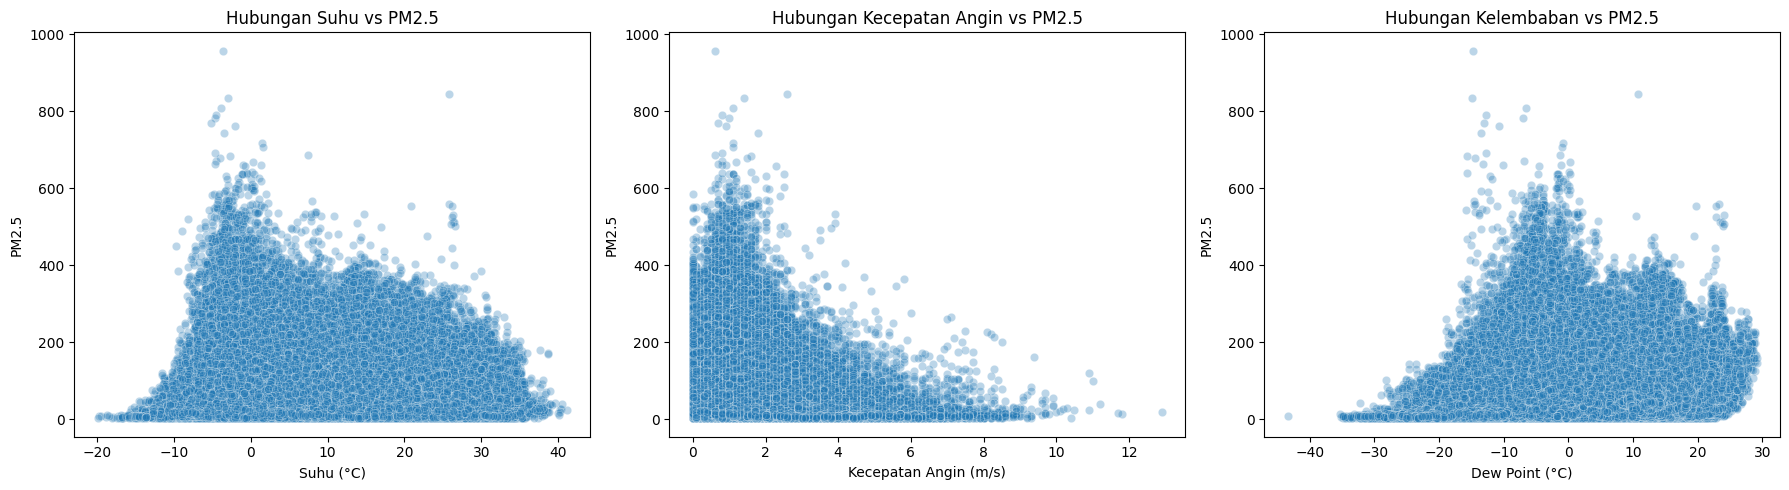

In [36]:

# Buat figure dengan 3 subplots untuk tiap faktor cuaca
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot PM2.5 vs Suhu (TEMP)
sns.scatterplot(data=df, x="TEMP", y="PM2.5", alpha=0.3, ax=axes[0])
axes[0].set_title("Hubungan Suhu vs PM2.5")
axes[0].set_xlabel("Suhu (°C)")
axes[0].set_ylabel("PM2.5")

# Scatter plot PM2.5 vs Kecepatan Angin (WSPM)
sns.scatterplot(data=df, x="WSPM", y="PM2.5", alpha=0.3, ax=axes[1])
axes[1].set_title("Hubungan Kecepatan Angin vs PM2.5")
axes[1].set_xlabel("Kecepatan Angin (m/s)")
axes[1].set_ylabel("PM2.5")

# Scatter plot PM2.5 vs Kelembaban (DEWP)
sns.scatterplot(data=df, x="DEWP", y="PM2.5", alpha=0.3, ax=axes[2])
axes[2].set_title("Hubungan Kelembaban vs PM2.5")
axes[2].set_xlabel("Dew Point (°C)")
axes[2].set_ylabel("PM2.5")

plt.tight_layout()
plt.show()


**Insight:**
- Dari Histogram Rata-rata PM2.5 per Musim di Setiap Lokasi
  - Polusi tertinggi terjadi di musim dingin (Winter) di semua lokasi, dengan Nongzhanguan dan Wanliu memiliki tingkat PM2.5 yang lebih tinggi dibanding Huairou.

  - Musim panas (Summer) memiliki tingkat PM2.5 terendah, menunjukkan udara lebih bersih di musim ini.

  - Nongzhanguan dan Wanliu umumnya memiliki tingkat polusi lebih tinggi dibandingkan Huairou di semua musim.

- Dari scatterplot
  - Suhu (TEMP) memiliki korelasi negatif dengan PM2.5

    Saat suhu meningkat, tingkat PM2.5 cenderung menurun. Hal ini bisa disebabkan oleh peningkatan konveksi udara saat panas, yang membantu menyebarkan polusi.

  - Kecepatan Angin (WSPM) memiliki korelasi negatif dengan PM2.5
    
    Angin yang lebih kuat membantu mengurangi konsentrasi polusi dengan menyebarkan partikel ke atmosfer yang lebih luas.

  - Kelembaban (DEWP) memiliki korelasi positif dengan PM2.5
    
    Udara yang lebih lembap mungkin meningkatkan kondensasi partikel polutan, menyebabkan akumulasi polusi lebih tinggi.

## Analisis Lanjutan (Opsional)

RFM Analysis untuk Polusi Udara:
       location  Recency   Frequency   Monetary
0       Huairou        6  150.812500  69.611516
1  Nongzhanguan        1  191.104167  84.935123
2        Wanliu        6  193.375000  83.386501


<ipython-input-35-130f673f78cb>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="location", y="Recency", data=rfm_df, ax=axes[0], palette="Blues_r")
<ipython-input-35-130f673f78cb>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="location", y="Frequency", data=rfm_df, ax=axes[1], palette="Greens_r")
<ipython-input-35-130f673f78cb>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="location", y="Monetary", data=rfm_df, ax=axes[2], palette="Reds_r")


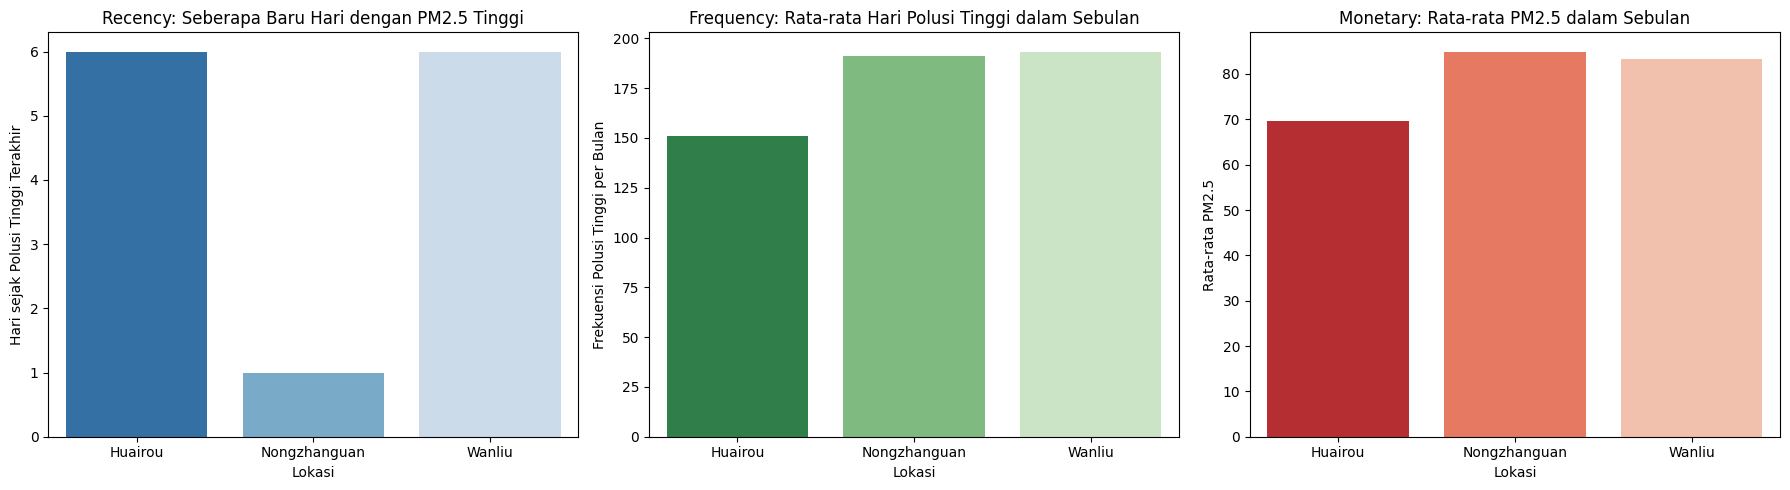

In [35]:
# RFM Analysis (Modifikasi untuk Polusi Udara)
# ==================================================
from datetime import datetime

# 1. Recency: Seberapa baru hari dengan PM2.5 tinggi terjadi
df_high_pm25 = df[df["PM2.5"] > df["PM2.5"].quantile(0.75)]
latest_date = df["date"].max()
recency = df_high_pm25.groupby("location")["date"].max().apply(lambda x: (latest_date - x).days)

# 2. Frequency: Berapa kali PM2.5 melebihi ambang batas dalam sebulan
df["year_month"] = df["date"].dt.to_period("M")
frequency = df[df["PM2.5"] > df["PM2.5"].quantile(0.75)].groupby(["location", "year_month"]).size()
frequency = frequency.groupby("location").mean()

# 3. Monetary: Rata-rata tingkat polusi dalam sebulan
monetary = df.groupby(["location", "year_month"])["PM2.5"].mean()
monetary = monetary.groupby("location").mean()

# Gabungkan hasil RFM
rfm_df = pd.DataFrame({"Recency": recency, "Frequency": frequency, "Monetary": monetary})
rfm_df = rfm_df.reset_index()
print("RFM Analysis untuk Polusi Udara:")
print(rfm_df)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency Plot
sns.barplot(x="location", y="Recency", data=rfm_df, ax=axes[0], palette="Blues_r")
axes[0].set_title("Recency: Seberapa Baru Hari dengan PM2.5 Tinggi")
axes[0].set_xlabel("Lokasi")
axes[0].set_ylabel("Hari sejak Polusi Tinggi Terakhir")

# Frequency Plot
sns.barplot(x="location", y="Frequency", data=rfm_df, ax=axes[1], palette="Greens_r")
axes[1].set_title("Frequency: Rata-rata Hari Polusi Tinggi dalam Sebulan")
axes[1].set_xlabel("Lokasi")
axes[1].set_ylabel("Frekuensi Polusi Tinggi per Bulan")

# Monetary Plot
sns.barplot(x="location", y="Monetary", data=rfm_df, ax=axes[2], palette="Reds_r")
axes[2].set_title("Monetary: Rata-rata PM2.5 dalam Sebulan")
axes[2].set_xlabel("Lokasi")
axes[2].set_ylabel("Rata-rata PM2.5")

plt.tight_layout()
plt.show()





## Conclusion

- Conclution pertanyaan 1
  - Musim sangat memengaruhi tingkat polusi udara.
  - Upaya pengendalian polusi perlu lebih difokuskan pada musim dingin, terutama di area perkotaan.
- Conclution pertanyaan 2
  - Polusi udara cenderung lebih tinggi saat suhu rendah & kelembaban tinggi.
  - Kecepatan angin yang lebih tinggi membantu mengurangi polusi.
  - Cuaca sangat memengaruhi tingkat polusi, terutama di daerah perkotaan dengan aktivitas industri dan transportasi tinggi.